In [23]:
%reload_ext autoreload
%autoreload 1
%aimport common
%aimport model.tumor_vit
%aimport train.cnn_train

import os
from typing import Tuple, List
import torch 
from torch import nn, optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from common import DATA_DIR, TRAIN_DIR, TEST_DIR, IMG_SIZE, CLASS_NAMES, DEVICE, NUM_CLASSES, OUTPUT_MODELS_DIR, OUTPUT_PLOTS_DIR
from model.tumor_vit import build_vit_model, build_optimizer
from train.cnn_train import train_model
from data_loader import create_data_loaders

# constants
IMG_SIZE: Tuple[int, int] = (150, 150)
BATCH_SIZE: int = 32
VALID_SPLIT: float = 0.2
EPOCHS: int = 5
os.makedirs(OUTPUT_MODELS_DIR, exist_ok=True)

In [ ]:
model = build_vit_model(NUM_CLASSES, IMG_SIZE, DEVICE)
optimizer = build_optimizer(model)

In [32]:
train_loader, val_loader, test_loader = create_data_loaders(max_images_per_class=100)

In [33]:
history = train_model(model, train_loader, val_loader, optimizer=optimizer)

Epoch 1/40 - Train Loss: 1.3798, Train Acc: 0.2719 - Val Loss: 1.3267, Val Acc: 0.4875
Epoch 2/40 - Train Loss: 1.3238, Train Acc: 0.3125 - Val Loss: 1.2235, Val Acc: 0.4000
Epoch 3/40 - Train Loss: 1.1643, Train Acc: 0.4469 - Val Loss: 0.9760, Val Acc: 0.6000
Epoch 4/40 - Train Loss: 1.0942, Train Acc: 0.4750 - Val Loss: 1.0087, Val Acc: 0.4250
Epoch 5/40 - Train Loss: 0.9711, Train Acc: 0.4688 - Val Loss: 0.9563, Val Acc: 0.3375
Epoch 6/40 - Train Loss: 0.9623, Train Acc: 0.4969 - Val Loss: 1.1003, Val Acc: 0.3500
Epoch 7/40 - Train Loss: 0.9761, Train Acc: 0.4969 - Val Loss: 0.8888, Val Acc: 0.4625
Epoch 8/40 - Train Loss: 0.9251, Train Acc: 0.5344 - Val Loss: 0.9369, Val Acc: 0.3375
Epoch 9/40 - Train Loss: 0.9234, Train Acc: 0.5125 - Val Loss: 1.0255, Val Acc: 0.4125
Epoch 10/40 - Train Loss: 0.9145, Train Acc: 0.5312 - Val Loss: 0.8436, Val Acc: 0.6250
Epoch 11/40 - Train Loss: 0.9188, Train Acc: 0.5344 - Val Loss: 0.8980, Val Acc: 0.6250
Epoch 12/40 - Train Loss: 0.9577, Train A

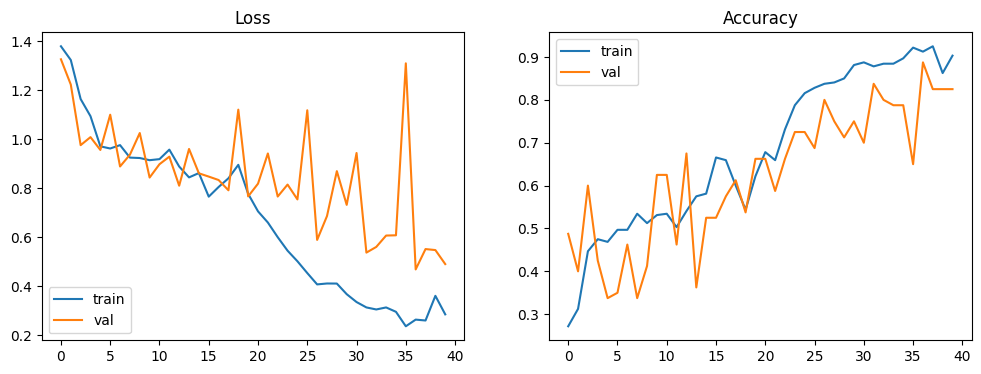

Test Loss: 4.2649
Test Accuracy: 0.4825


In [34]:
from train.cnn_train import validate


def plot_history(history: dict[str, List[float]]) -> None:
    fig, axes = plt.subplots(1, 2, figsize=(12,4))
    axes[0].plot(history["train_loss"], label="train")
    axes[0].plot(history["val_loss"], label="val")
    axes[0].set_title("Loss"); axes[0].legend()
    axes[1].plot(history["train_acc"], label="train")
    axes[1].plot(history["val_acc"], label="val")
    axes[1].set_title("Accuracy"); axes[1].legend()
    plt.show()

def test_evaluate(model: nn.Module,
                  loader: DataLoader
                  ) -> None:
    loss, acc = validate(model, loader, nn.CrossEntropyLoss())
    print(f"Test Loss: {loss:.4f}\nTest Accuracy: {acc:.4f}")

plot_history(history)
test_evaluate(model, test_loader)

In [35]:
# usage
from train.save import save_experiment

save_experiment(
    model,
    history,
    OUTPUT_MODELS_DIR,
    save_full_model=True,
    export_torchscript=False,
    prefix="brain_tumor_mri_vit",
    remark="Test Improved ViT with 150 size limited to 100 images per class"
)

Saving to: output\models\brain_tumor_mri_vit_0000
